<hr style='border-top:4px solid #1F77B4;'>

<h2><span style="color: #1F77B4; font-size: 40px">Chapitre 4</span>  </h2>

<h1><span style="color: #1F77B4; font-size: 60px"> Les réseaux de neurones profonds</span> </h1>

<h3><span style="color: #1F77B4; font-size: 50px"> Défis et solutions</span> </h3>

<hr style='border-top:4px solid #1F77B4;'>

### Importation des bibliothèques

In [1]:
import numpy                         as np
import matplotlib.pyplot             as plt
import tensorflow                    as tf
from IPython.display                 import display, HTML
from tensorflow.keras.models         import Sequential
from tensorflow.keras.layers         import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

In [2]:
# Fixer les graines aléatoires pour la reproductibilité
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

<hr style='border-top:4px solid #1F77B4;'>

In [3]:
def save_figure(fig, path):
    # Extraire le répertoire du chemin donné
    directory = os.path.dirname(path)
    
    # Créer le répertoire s'il n'existe pas
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Sauvegarder dans plusieurs formats
    fig.savefig(f"{path}.pdf", format="pdf")
    fig.savefig(f"{path}.png", format="png")
    fig.savefig(f"{path}.jpg", format="jpg")

<hr style='border-top:4px solid #1F77B4;'>

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.1 : Modèle séquentiel avec des initialisations de Glorot</h3>

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import GlorotUniform, GlorotNormal

# Créer un modèle séquentiel
model = Sequential()

# Ajouter une couche Input
model.add(Input(shape=(100,)))

# Ajouter une couche dense avec initialisation Glorot Uniforme
model.add(Dense(units=64, 
                activation='relu', 
                kernel_initializer=GlorotUniform()))

# Ajouter une deuxième couche dense avec initialisation Glorot Normale
model.add(Dense(units=32, 
                activation='relu', 
                kernel_initializer=GlorotNormal()))

# Ajouter une couche de sortie avec initialisation Glorot Uniforme
model.add(Dense(units=10, 
                activation='softmax', 
                kernel_initializer=GlorotUniform()))


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.2 : Modèle séquentiel avec des initialisations de He</h3>

In [5]:
from tensorflow.keras.initializers import HeUniform, HeNormal

# Créer un modèle séquentiel
model = Sequential()

# Ajout d'une couche d'entrée
model.add(Input(shape=(100,)))

# Première couche Dense avec HeUniform
model.add(Dense(units=64,
                activation='relu',
                kernel_initializer=HeUniform()))

# Deuxième couche Dense avec HeNormal
model.add(Dense(units=64,
                activation='relu',
                kernel_initializer=HeNormal()))

<h3><span style="font-size: 30px">🎴</span> Figure 4.4 : Les fonctions d'activations sigmoïdes et sa dérivée </h3>

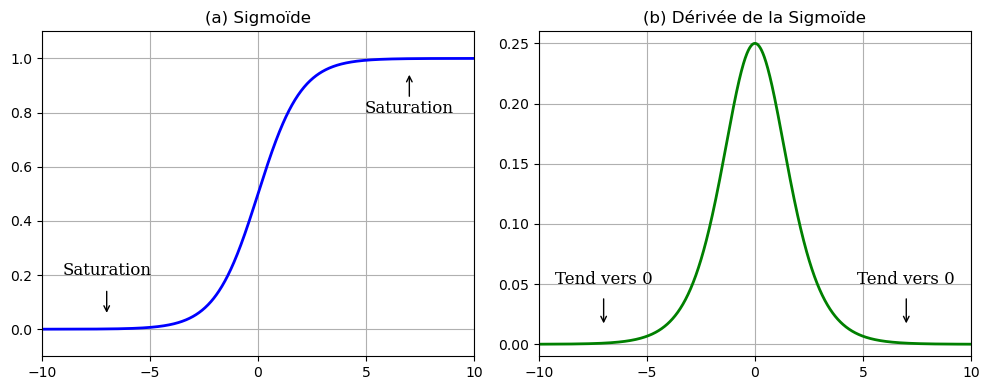

In [6]:
# Définir les fonctions
def sigmoid(x):
    """Fonction sigmoïde"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Dérivée de la fonction sigmoïde"""
    sig = sigmoid(x)
    return sig * (1 - sig)

# Créer les données
x = np.linspace(-10, 10, 1000)
y_sigmoid = sigmoid(x)
y_derivative = sigmoid_derivative(x)

# Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Configuration du style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.alpha'] = 0.7

# Tracer la fonction sigmoïde
ax1.plot(x, y_sigmoid, 'b-', linewidth=2)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-0.1, 1.1)
ax1.set_title("(a) Sigmoïde")
ax1.grid(True)
ax1.set_xticks([-10, -5, 0, 5, 10])
ax1.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Ajouter les annotations de saturation
ax1.annotate("Saturation", xy=(7, 0.8), xytext=(7, 0.8), 
             ha='center', fontsize=12)
ax1.annotate("", xy=(7, 0.95), xytext=(7, 0.85), 
             arrowprops=dict(arrowstyle="->", color='black'))

ax1.annotate("Saturation", xy=(-7, 0.2), xytext=(-7, 0.2), 
             ha='center', fontsize=12)
ax1.annotate("", xy=(-7, 0.05), xytext=(-7, 0.15), 
             arrowprops=dict(arrowstyle="->", color='black'))

# Tracer la dérivée de la sigmoïde
ax2.plot(x, y_derivative, 'g-', linewidth=2)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-0.01, 0.26)
ax2.set_title("(b) Dérivée de la Sigmoïde")
ax2.grid(True)
ax2.set_xticks([-10, -5, 0, 5, 10])
ax2.set_yticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25])

# Ajouter les annotations pour la dérivée
ax2.annotate("Tend vers 0", xy=(7, 0.05), xytext=(7, 0.05), 
             ha='center', fontsize=12)
ax2.annotate("", xy=(7, 0.015), xytext=(7, 0.04), 
             arrowprops=dict(arrowstyle="->", color='black'))

ax2.annotate("Tend vers 0", xy=(-7, 0.05), xytext=(-7, 0.05), 
             ha='center', fontsize=12)
ax2.annotate("", xy=(-7, 0.015), xytext=(-7, 0.04), 
             arrowprops=dict(arrowstyle="->", color='black'))

# Ajustement et sauvegarde de la figure
plt.tight_layout()
save_figure(fig, "Figures/Figure_4.4/Chap4_Figure_4.4")

# Afficher la figure
plt.show()


<h3><span style="font-size: 30px">🎴</span> Figure 4.5 : Les fonctions d'activations ReLU et sa dérivée </h3>

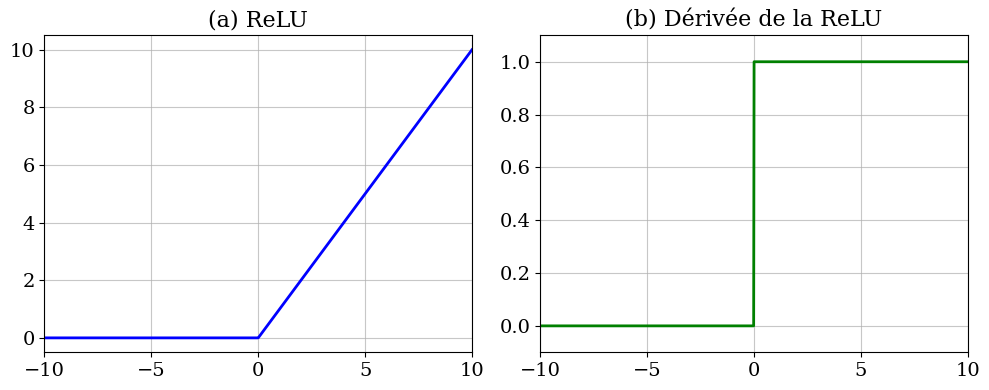

In [7]:
# Définir les fonctions
def relu(x):
    """Fonction ReLU (Rectified Linear Unit)"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Dérivée de la fonction ReLU"""
    return np.where(x > 0, 1, 0)

# Créer les données
x = np.linspace(-10, 10, 1000)
y_relu = relu(x)
y_derivative = relu_derivative(x)

# Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Configuration du style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.alpha'] = 0.7

# Tracer la fonction ReLU
ax1.plot(x, y_relu, 'b-', linewidth=2)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-0.5, 10.5)
ax1.set_title("(a) ReLU", fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.grid(True)

# Tracer la dérivée de la ReLU
ax2.plot(x, y_derivative, 'g-', linewidth=2)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-0.1, 1.1)
ax2.set_title("(b) Dérivée de la ReLU", fontsize=16)
ax2.tick_params(axis='both', labelsize=14)
ax2.grid(True)

# Ajuster la disposition
plt.tight_layout()
save_figure(fig, "Figures/Figure_4.5/Chap4_Figure_4.5")

# Afficher la figure
plt.show()


<h3><span style="font-size: 30px">🎴</span> Figure 4.6 : Fonctions d'activations non-saturantes (a) Fonction Leaky ReLU, (b) Fonction ELU et (c) Fonction SELU</h3>

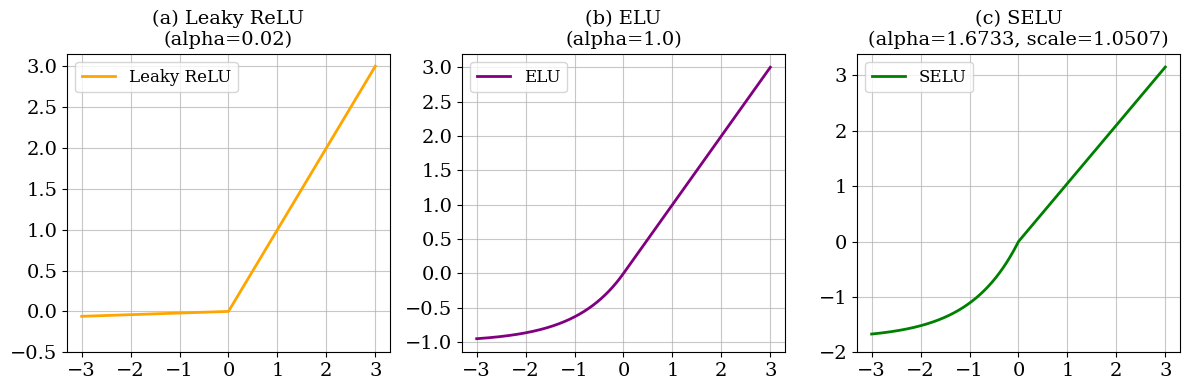

In [8]:
# Définir les fonctions d'activation
def leaky_relu(x, alpha=0.02):
    """Fonction Leaky ReLU avec pente alpha pour x < 0"""
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    """Fonction ELU (Exponential Linear Unit)"""
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def selu(x, alpha=1.6733, scale=1.0507):
    """Fonction SELU (Scaled Exponential Linear Unit)"""
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Créer les données
x = np.linspace(-3, 3, 1000)
y_leaky_relu = leaky_relu(x)
y_elu = elu(x)
y_selu = selu(x)

# Créer la figure avec trois sous-graphiques
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Leaky ReLU
ax1.plot(x, y_leaky_relu, color='orange', label="Leaky ReLU", linewidth=2)
ax1.set_title("(a) Leaky ReLU\n(alpha=0.02)", fontsize=14)
ax1.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax1.set_yticks([-0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
ax1.tick_params(axis='both', labelsize=14)
ax1.grid(True)
ax1.legend(fontsize=12)

# ELU
ax2.plot(x, y_elu, color='purple', label="ELU", linewidth=2)
ax2.set_title("(b) ELU\n(alpha=1.0)", fontsize=14)
ax2.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax2.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
ax2.tick_params(axis='both', labelsize=14)
ax2.grid(True)
ax2.legend(fontsize=12)

# SELU
ax3.plot(x, y_selu, color='green', label="SELU", linewidth=2)
ax3.set_title("(c) SELU\n(alpha=1.6733, scale=1.0507)", fontsize=14)
ax3.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax3.set_yticks([-2.0, -1.0, 0.0, 1.0, 2.0, 3.0])
ax3.tick_params(axis='both', labelsize=14)
ax3.grid(True)
ax3.legend(fontsize=12)

# Ajuster la disposition
plt.tight_layout()
save_figure(fig, "Figures/Figure_4.6/Chap4_Figure_4.6")

# Afficher la figure
plt.show()


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.3 : Différentes fonctions d'activation</h3>

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Input

# Créer un modèle séquentiel
model = Sequential()

# Ajouter une couche Input explicite comme première couche
model.add(Input(shape=(10,)))

# Ajouter la première couche avec ReLU
model.add(Dense(64, activation='relu'))

# Ajouter la deuxième couche avec ELU
model.add(Dense(64, activation='elu'))

# Ajouter une troisième couche avec Leaky ReLU (alpha=0.1)
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1)) 

# Ajouter une quatrième couche avec SELU
model.add(Dense(64, activation='selu'))

# Ajouter une couche de sortie avec Sigmoide
model.add(Dense(1, activation='sigmoid'))

C:\Users\askar\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.4 : Normalisation par lots (BatchNormalization())</h3>

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

model = Sequential()
model.add(Dense(300, activation="elu", kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.5 : Écrêtage du gradient (cliping)</h3>

### Méthode 1

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import random

# Fixer les graines aléatoires pour la reproductibilité
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Générer un jeu de données de régression plus complexe
X, y = make_regression(n_samples=1000, n_features=100, noise=10.0, random_state=1)

# Division train/test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainY, testY = y[:n_train], y[n_train:]

In [12]:
# Fonction pour créer, compiler, entraîner et évaluer le modèle
def train_model(cliptype=None, clipvalue=None):
    # Définir le modèle 
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))
    model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))
    
    # Préparer l'optimiseur avec/sans écrêtage
    if cliptype is None:
        optimizer = SGD(learning_rate=0.001, momentum=0.9)
        title = "Sans écrêtage"
    elif cliptype == "value":
        optimizer = SGD(learning_rate=0.001, momentum=0.9, clipvalue=clipvalue)
        title = f"clipvalue={clipvalue}"
    elif cliptype == "norm":
        optimizer = SGD(learning_rate=0.001, momentum=0.9, clipnorm=clipvalue)
        title = f"clipnorm={clipvalue}"
    
    # Compiler le modèle
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    # Entraîner le modèle
    history = model.fit(
        trainX, trainY,
        validation_data=(testX, testY),
        epochs=200,
        verbose=0
    )
    
    # Évaluer le modèle
    train_mse = model.evaluate(trainX, trainY, verbose=0)
    test_mse = model.evaluate(testX, testY, verbose=0)
    
    return model, history, train_mse, test_mse, title

# Entraîner les modèles avec différentes configurations d'écrêtage
model1, history1, train_mse1, test_mse1, title1 = train_model(cliptype=None)
model2, history2, train_mse2, test_mse2, title2 = train_model(cliptype="value", clipvalue=0.1)
model3, history3, train_mse3, test_mse3, title3 = train_model(cliptype="norm", clipvalue=1.0)

# Afficher les résultats
print(f"Performance des modèles après 200 itérations")
print(f"Cas 1 - Sans Écrêtage : Train MSE: {train_mse1:.3f}, Test MSE: {test_mse1:.3f}")
print(f"Cas 2 - Écrêtage par valeur: Train MSE: {train_mse2:.3f}, Test MSE: {test_mse2:.3f}")
print(f"Cas 3 - Écrêtage par norme: Train MSE: {train_mse3:.3f}, Test MSE: {test_mse3:.3f}")

Performance des modèles après 200 itérations
Cas 1 - Sans Écrêtage : Train MSE: nan, Test MSE: nan
Cas 2 - Écrêtage par valeur: Train MSE: 19291.617, Test MSE: 23216.666
Cas 3 - Écrêtage par norme: Train MSE: 95.093, Test MSE: 479.039


### Méthode 2

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import random

# Fixer les graines aléatoires pour la reproductibilité
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Générer un jeu de données de régression plus complexe
X, y = make_regression(n_samples=1000, n_features=100, noise=10.0, random_state=1)

# Division train/test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainY, testY = y[:n_train], y[n_train:]

In [14]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))
    model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='linear'))
    return model

In [15]:
# Cas 1: Modèle sans écrêtage
model1 = create_model()  # Fonction qui crée un modèle avec la même architecture
model1.compile(loss='mean_squared_error',
               optimizer = SGD(learning_rate=0.001, momentum=0.9))
history1  = model1.fit(trainX, trainY, 
                       validation_data=(testX, testY), 
                       epochs=200, verbose=1)

# Cas 2: Modèle avec écrêtage par valeur
model2 = create_model()
model2.compile(loss='mean_squared_error',
               optimizer = SGD(learning_rate=0.001, momentum=0.9, clipvalue=0.1))
history2  = model2.fit(trainX, trainY, 
                       validation_data=(testX, testY), 
                       epochs=200, verbose=1)

# Cas 3: Modèle avec écrêtage par norme
model3 = create_model()
model3.compile(loss='mean_squared_error',
               optimizer = SGD(learning_rate=0.001, momentum=0.9, clipnorm=1.0))
history3  = model3.fit(trainX, trainY, 
                       validation_data=(testX, testY), 
                       epochs=200, verbose=1)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35757.6992 - val_loss: 46408.2734
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 13/200
16/16 ━━━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 73/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 74/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 75/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 76/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 77/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 78/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 79/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 80/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 81/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 82/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 83/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 84/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 144/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 145/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 146/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 147/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 148/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 149/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 150/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 151/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 152/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 153/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 154/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 155/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40112.2031 - val_loss: 42640.0898
Epoch 14/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40046.6367 - val_loss: 42585.6953
Epoch 15/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39978.7422 - val_loss: 42528.9297
Epoch 16/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39907.4844 - val_loss: 42469.7383
Epoch 17/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39833.6758 - val_loss: 42407.8398
Epoch 18/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39756.4883 - val_loss: 42343.4922
Epoch 19/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39676.3711 - val_loss: 42275.8867
Epoch 20/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39593.5664 - val_loss: 42205.6992
Epoch 21/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39507.3711 - val_loss: 42133.3555
Epoch 22/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39418.0195 - val_loss: 42059.1484
Epoch 23/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39325.9844 - 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31374.9414 - val_loss: 35375.9102
Epoch 78/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31197.7188 - val_loss: 35227.2617
Epoch 79/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31020.2070 - val_loss: 35078.8086
Epoch 80/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30843.4414 - val_loss: 34930.3711
Epoch 81/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30667.1504 - val_loss: 34781.2070
Epoch 82/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30490.3770 - val_loss: 34632.4375
Epoch 83/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30313.3320 - val_loss: 34483.4922
Epoch 84/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30136.5625 - val_loss: 34334.9648
Epoch 85/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29960.4727 - val_loss: 34186.1016
Epoch 86/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29784.6621 - val_loss: 34036.0273
Epoch 87/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29608.6055 - 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22351.1523 - val_loss: 27192.1289
Epoch 141/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22266.7305 - val_loss: 27101.8477
Epoch 142/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22183.6484 - val_loss: 27011.5938
Epoch 143/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22102.6230 - val_loss: 26921.9473
Epoch 144/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22022.6191 - val_loss: 26832.5586
Epoch 145/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21943.5312 - val_loss: 26743.8594
Epoch 146/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21866.0996 - val_loss: 26657.4980
Epoch 147/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21789.9668 - val_loss: 26571.8223
Epoch 148/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21715.0527 - val_loss: 26486.3320
Epoch 149/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21641.7773 - val_loss: 26402.9160
Epoch 150/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 215

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40789.1562 - val_loss: 43165.0391
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40761.3906 - val_loss: 43142.0625
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40733.6484 - val_loss: 43117.8828
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40704.9336 - val_loss: 43091.3594
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40674.6484 - val_loss: 43061.9023
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40641.6562 - val_loss: 43029.1680
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40605.3789 - val_loss: 42992.8828
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40564.5820 - val_loss: 42952.1562
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40518.7852 - val_loss: 42905.5156
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40466.2148 - val_loss: 42851.9414
Epoch 13/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40406.4219 - val_lo

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26734.7012 - val_loss: 29863.9648
Epoch 68/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26342.2402 - val_loss: 29492.3672
Epoch 69/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25946.0938 - val_loss: 29117.1465
Epoch 70/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25546.0000 - val_loss: 28738.1543
Epoch 71/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25143.0645 - val_loss: 28355.2070
Epoch 72/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24736.5566 - val_loss: 27968.8105
Epoch 73/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24327.2402 - val_loss: 27578.9434
Epoch 74/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23915.0098 - val_loss: 27185.4258
Epoch 75/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23499.9160 - val_loss: 26788.4316
Epoch 76/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23082.1699 - val_loss: 26387.9668
Epoch 77/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22662.1543 - 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3281.1626 - val_loss: 5408.9146
Epoch 132/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3096.9788 - val_loss: 5164.2754
Epoch 133/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2919.8965 - val_loss: 4926.1431
Epoch 134/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2749.7163 - val_loss: 4694.5435
Epoch 135/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2586.1882 - val_loss: 4469.4600
Epoch 136/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2429.5896 - val_loss: 4251.1357
Epoch 137/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2279.7473 - val_loss: 4039.7378
Epoch 138/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2136.6489 - val_loss: 3835.5571
Epoch 139/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2000.2665 - val_loss: 3638.5881
Epoch 140/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1870.6108 - val_loss: 3448.8079
Epoch 141/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1747.2310 - val_loss: 3

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 109.3206 - val_loss: 491.4848
Epoch 197/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.0905 - val_loss: 488.2053
Epoch 198/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 106.8983 - val_loss: 485.0410
Epoch 199/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 105.7503 - val_loss: 481.9832
Epoch 200/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 104.6621 - val_loss: 479.0388


In [16]:
# Évaluer le modèle
train_mse1 = model1.evaluate(trainX, trainY, verbose=0)
test_mse1  = model1.evaluate(testX, testY, verbose=0)

train_mse2 = model2.evaluate(trainX, trainY, verbose=0)
test_mse2  = model2.evaluate(testX, testY, verbose=0)

train_mse3 = model3.evaluate(trainX, trainY, verbose=0)
test_mse3  = model3.evaluate(testX, testY, verbose=0)

# Afficher les résultats
print(f"Performance des modèles après 200 itérations")
print(f"Cas 1 - Sans Écrêtage : Train MSE: {train_mse1:.3f}, Test MSE: {test_mse1:.3f}")
print(f"Cas 2 - Écrêtage par valeur: Train MSE: {train_mse2:.3f}, Test MSE: {test_mse2:.3f}")
print(f"Cas 3 - Écrêtage par norme: Train MSE: {train_mse3:.3f}, Test MSE: {test_mse3:.3f}")

Performance des modèles après 200 itérations
Cas 1 - Sans Écrêtage : Train MSE: nan, Test MSE: nan
Cas 2 - Écrêtage par valeur: Train MSE: 19291.617, Test MSE: 23216.666
Cas 3 - Écrêtage par norme: Train MSE: 95.093, Test MSE: 479.039


<h3><span style="font-size: 30px">🎴</span> Figure 4.8 : Écrêtage du gradient</h3>

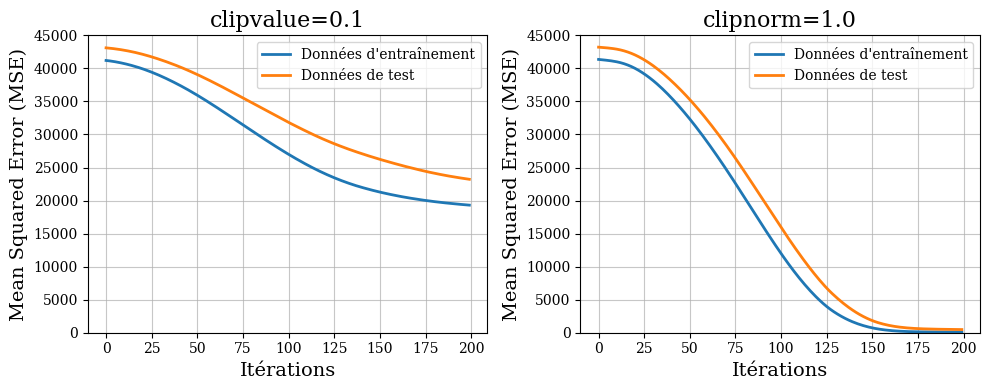

In [17]:
# Créer la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Définir les mêmes limites pour l'axe y
y_max = 45000
y_min = 0

# Figure pour clipvalue=1
ax1.plot(history2.history['loss'], label="Données d'entraînement", linewidth=2)
ax1.plot(history2.history['val_loss'], label="Données de test", linewidth=2)
ax1.set_title('clipvalue=0.1', fontsize=16)
ax1.set_xlabel('Itérations', fontsize=14)
ax1.set_ylabel('Mean Squared Error (MSE)', fontsize=14)
ax1.set_ylim(y_min, y_max)
ax1.legend()
ax1.grid(True)

# Figure pour clipnorm=1.0
ax2.plot(history3.history['loss'], label="Données d'entraînement", linewidth=2)
ax2.plot(history3.history['val_loss'], label="Données de test", linewidth=2)
ax2.set_title('clipnorm=1.0', fontsize=16)
ax2.set_xlabel('Itérations', fontsize=14)
ax2.set_ylabel('Mean Squared Error (MSE)', fontsize=14)
ax2.set_ylim(y_min, y_max)
ax2.legend()
ax2.grid(True)


plt.tight_layout()
save_figure(fig, "Figures/Figure_4.8/Chap4_Figure_4.8")

plt.show()

### Figure pour clipvalue=0.1

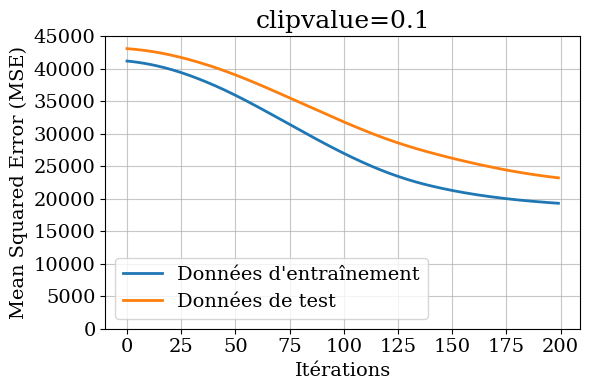

In [18]:
# Créer la figure
fig = plt.figure(figsize=(6, 4))

# Figure pour clipvalue=0.1
plt.plot(history2.history['loss'], label="Données d'entraînement", linewidth=2)
plt.plot(history2.history['val_loss'], label="Données de test", linewidth=2)
plt.title('clipvalue=0.1', fontsize=18)
plt.xlabel('Itérations', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim([0, 45000])
plt.grid(True)

plt.tight_layout()
save_figure(fig, "Figures/Figure_4.8/Chap4_Figure_4.8_a")
plt.show()

### Figure pour clipnorm=1.0

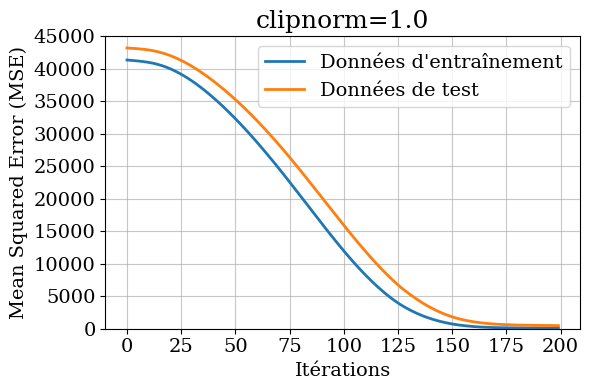

In [19]:
# Créer la figure
fig = plt.figure(figsize=(6, 4))

# Figure pour clipnorm=1.0
plt.plot(history3.history['loss'], label="Données d'entraînement", linewidth=2)
plt.plot(history3.history['val_loss'], label="Données de test", linewidth=2)
plt.title('clipnorm=1.0', fontsize=18)
plt.xlabel('Itérations', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim([0, 45000])
plt.grid(True)

plt.tight_layout()
save_figure(fig, "Figures/Figure_4.8/Chap4_Figure_4.8_b")
plt.show()

<h3><span style="font-size: 30px">🎴</span> Figure 4.9 : Comparaison visuelle de la descente de gradient standard et de la descente de gradient avec momentum</h3>

C:\Users\askar\AppData\Local\Temp\ipykernel_16320\2121892782.py:17: RuntimeWarning: invalid value encountered in divide
  U, V = U / norm, V / norm


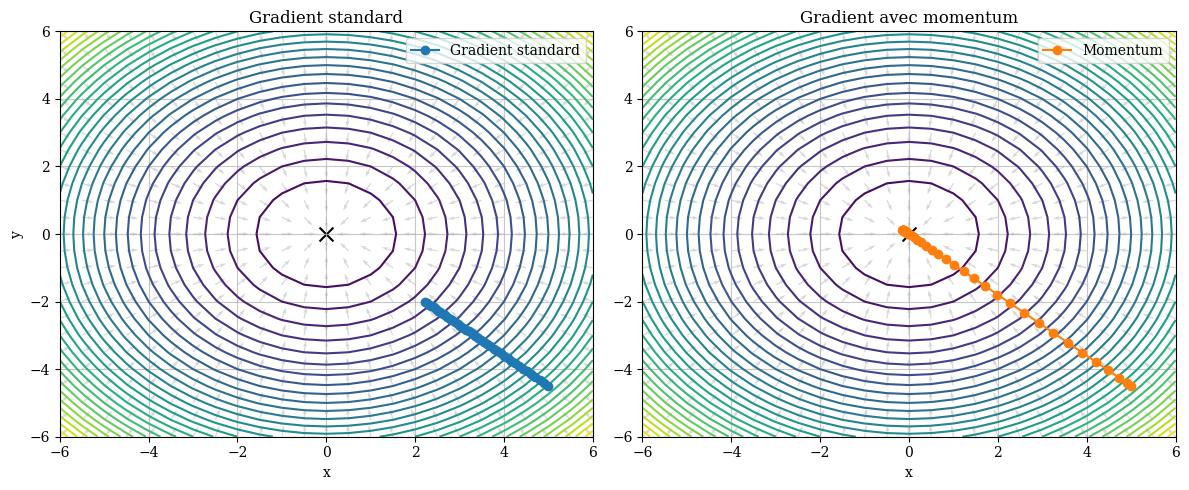

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de coût et son gradient
def J(x, y):
    return x**2 + y**2

def grad_J(x, y):
    return np.array([2*x, 2*y])

# Grille pour champ de gradient
x_vals = np.linspace(-6, 6, 25)
y_vals = np.linspace(-6, 6, 25)
X, Y = np.meshgrid(x_vals, y_vals)
U, V = grad_J(X, Y)
norm = np.sqrt(U**2 + V**2)
U, V = U / norm, V / norm

# Paramètres
x0 = np.array([5.0, -4.5])  # point de départ plus éloigné
steps = 40
lr_std = 0.01
lr_mom = 0.01 # Taux d'apprentissage pour le momentum
mu = 0.8    # Léger réduction du facteur de momentum

# === Descente standard ===
x_std = x0.copy()
traj_std = [x_std.copy()]
loss_std = [J(x_std[0], x_std[1])]
for _ in range(steps):
    grad = grad_J(x_std[0], x_std[1])
    x_std -= lr_std * grad
    traj_std.append(x_std.copy())
    loss_std.append(J(x_std[0], x_std[1]))
traj_std = np.array(traj_std)

# === Descente avec momentum ===
x_mom = x0.copy()
v = np.zeros_like(x0)
traj_mom = [x_mom.copy()]
loss_mom = [J(x_mom[0], x_mom[1])]
for _ in range(steps):
    grad = grad_J(x_mom[0], x_mom[1])
    v = mu * v + grad  # accumulation
    x_mom -= lr_mom * v
    traj_mom.append(x_mom.copy())
    loss_mom.append(J(x_mom[0], x_mom[1]))
traj_mom = np.array(traj_mom)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Trajectoire standard ---
axes[0].contour(X, Y, J(X, Y), levels=30, cmap='viridis')
axes[0].quiver(X, Y, -U, -V, color='gray', alpha=0.3)
axes[0].plot(traj_std[:, 0], traj_std[:, 1], color='#1f77b4', marker='o', label='Gradient standard')
axes[0].scatter([0], [0], color='black', marker='x', s=100)
axes[0].set_title("Gradient standard")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].grid(True)

# --- Trajectoire momentum ---
axes[1].contour(X, Y, J(X, Y), levels=30, cmap='viridis')
axes[1].quiver(X, Y, -U, -V, color='gray', alpha=0.3)
axes[1].plot(traj_mom[:, 0], traj_mom[:, 1], color='#ff7f0e', marker='o', label='Momentum')
axes[1].scatter([0], [0], color='black', marker='x', s=100)
axes[1].set_title("Gradient avec momentum")
axes[1].set_xlabel("x")
axes[1].legend()
axes[1].grid(True)


plt.tight_layout()

plt.show()

### Descente de gradient standard

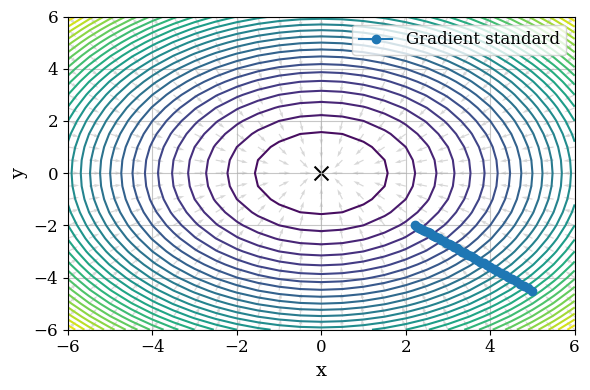

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))

# --- Trajectoire standard ---
ax.contour(X, Y, J(X, Y), levels=30, cmap='viridis')
ax.quiver(X, Y, -U, -V, color='gray', alpha=0.3)
ax.plot(traj_std[:, 0], traj_std[:, 1], color='#1f77b4', marker='o', label='Gradient standard')
ax.scatter([0], [0], color='black', marker='x', s=100)

ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=12)
ax.grid(True)

# Ajuster la disposition
plt.tight_layout()
save_figure(fig, "Figures/Figure_4.9/Chap4_Figure_4.9-a")

# Afficher la figure
plt.show()

### Descente de gradient avec momentum

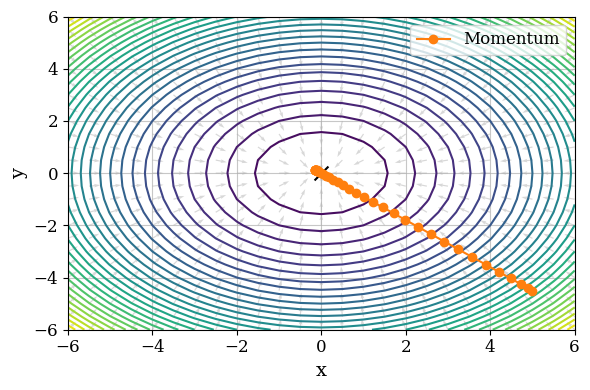

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))

# --- Trajectoire momentum ---
ax.contour(X, Y, J(X, Y), levels=30, cmap='viridis')
ax.quiver(X, Y, -U, -V, color='gray', alpha=0.3)
ax.plot(traj_mom[:, 0], traj_mom[:, 1], color='#ff7f0e', marker='o', label='Momentum')
ax.scatter([0], [0], color='black', marker='x', s=100)

ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(fontsize=12)
ax.grid(True)

# Ajuster la disposition
plt.tight_layout()
save_figure(fig, "Figures/Figure_4.9/Chap4_Figure_4.9-b")

# Afficher la figure
plt.show()

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 4.6 : Les optimiseurs SGD, Adagrad, Adam et Nadam</h3>

In [23]:
from tensorflow.keras.optimizers import SGD, Adagrad, Adam, Nadam

# Optimiseur avec Momentum (Inertie)
optimizer = SGD(learning_rate=0.001, momentum=0.9)

# Optimiseur avec Nesterov Accelerated Gradient
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# Optimiseur AdaGrad
optimizer = Adagrad(learning_rate=0.001)

# Optimiseur Adam
optimizer = Adam(learning_rate=0.001)

# Optimiseur Nadam
optimizer = Nadam(learning_rate=0.001)